
Processing: jana_nerudová.parquet


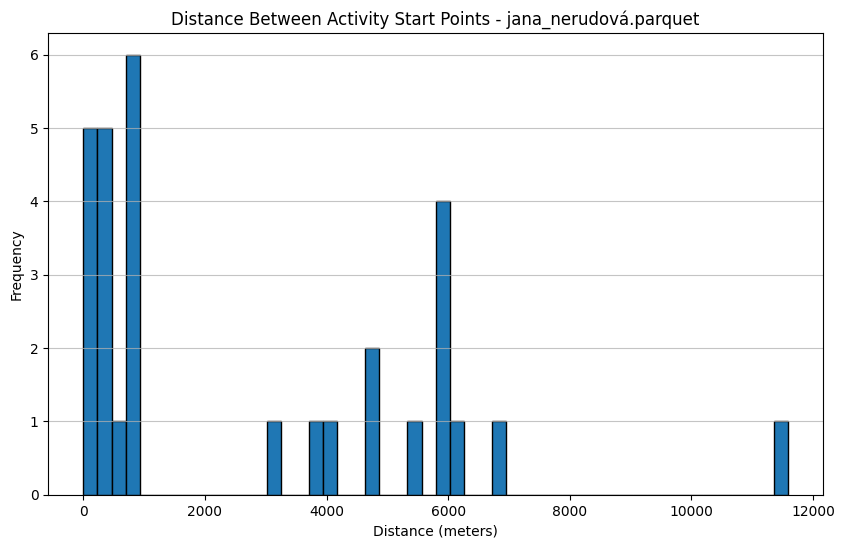


Processing: brad_stahlman.parquet


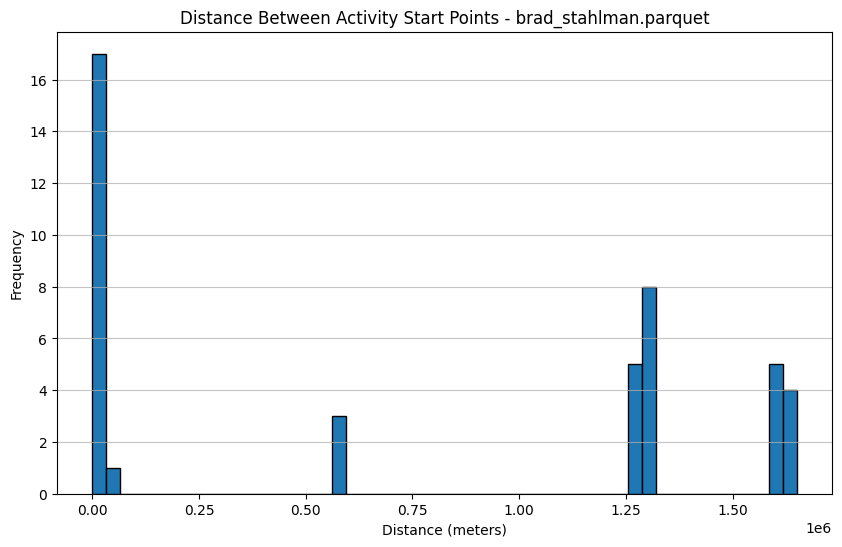


Processing: brian_watson.parquet


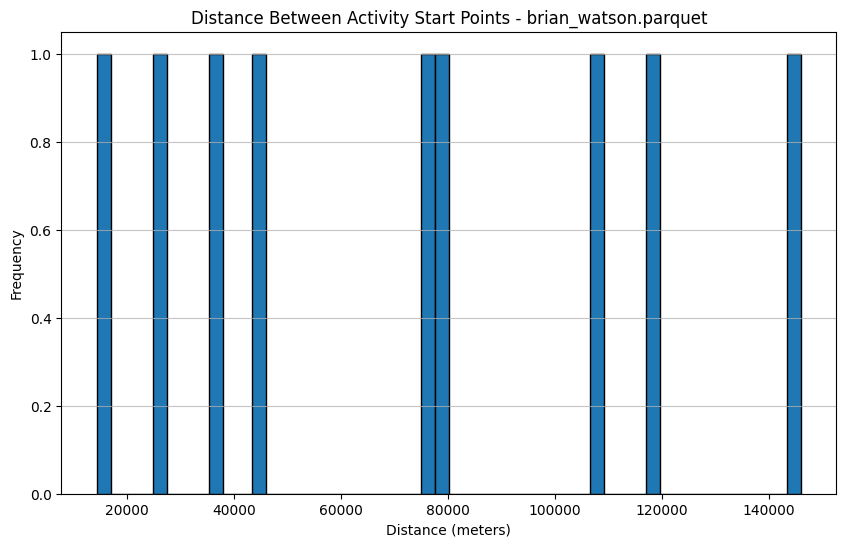


Processing: dennis_lindsay.parquet


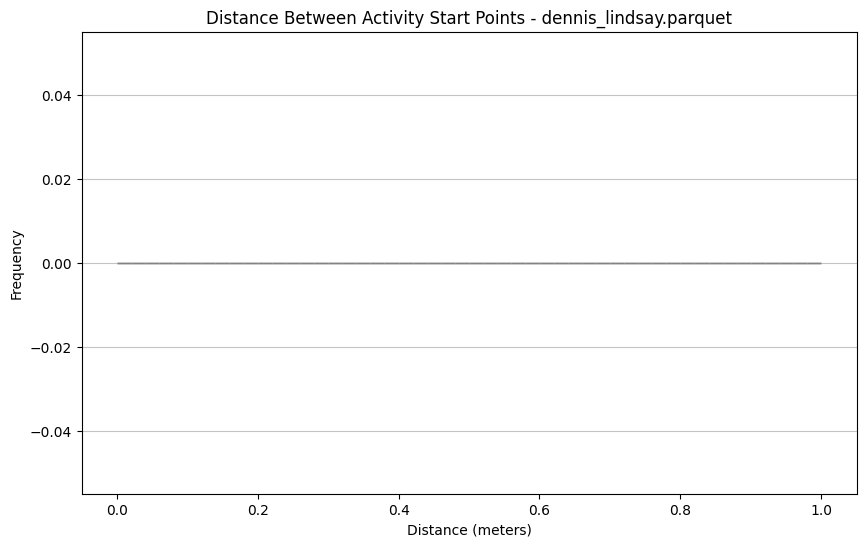


Processing: john_goss.parquet


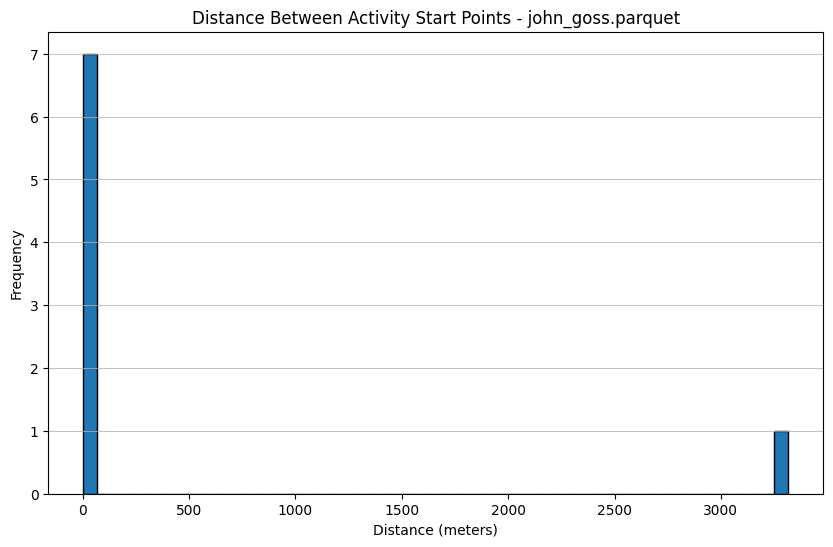


Processing: issy_nielson.parquet


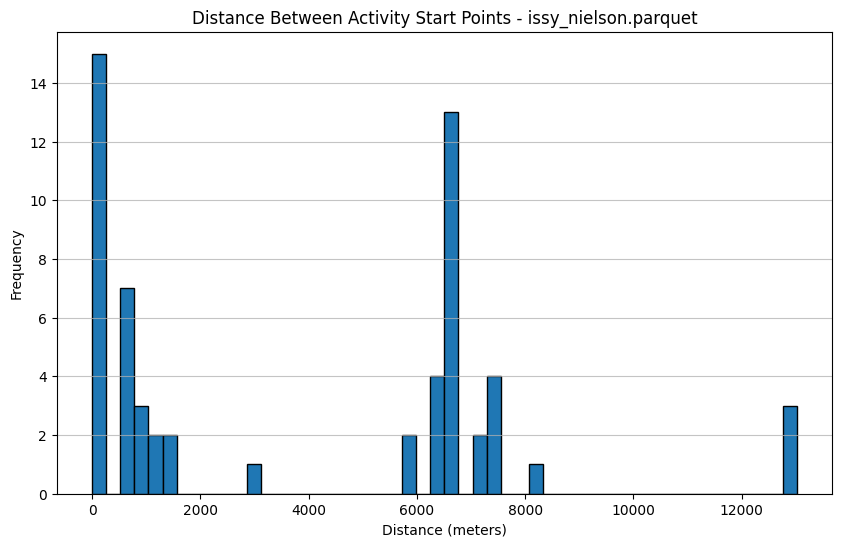


Processing: stefan_hornke.parquet


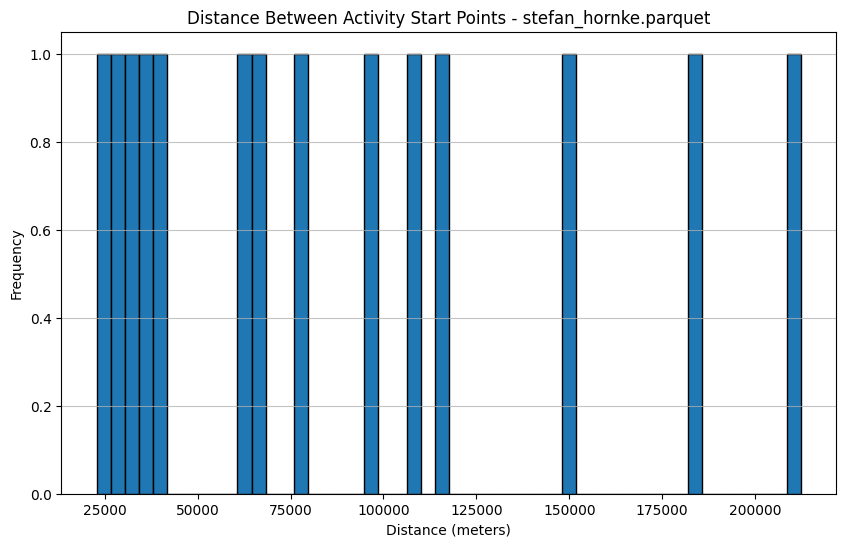


Processing: todd_baum.parquet


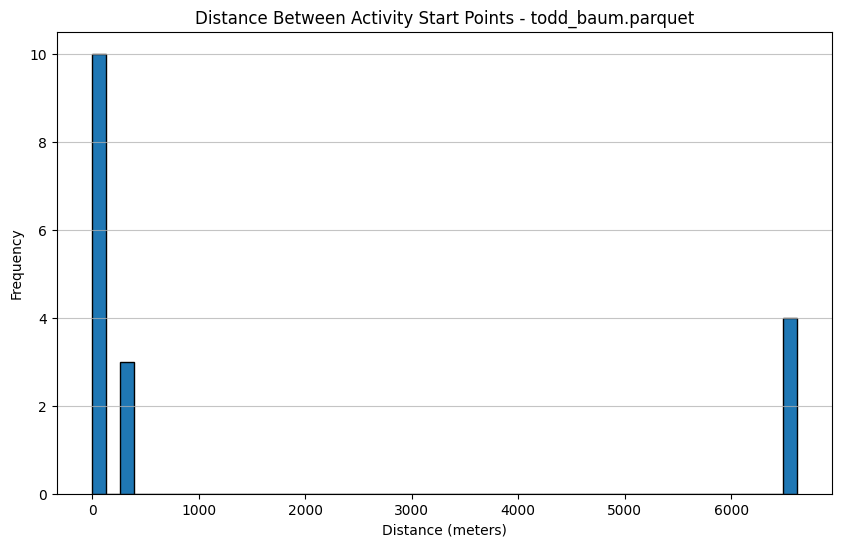


Processing: rhiannon_settles.parquet


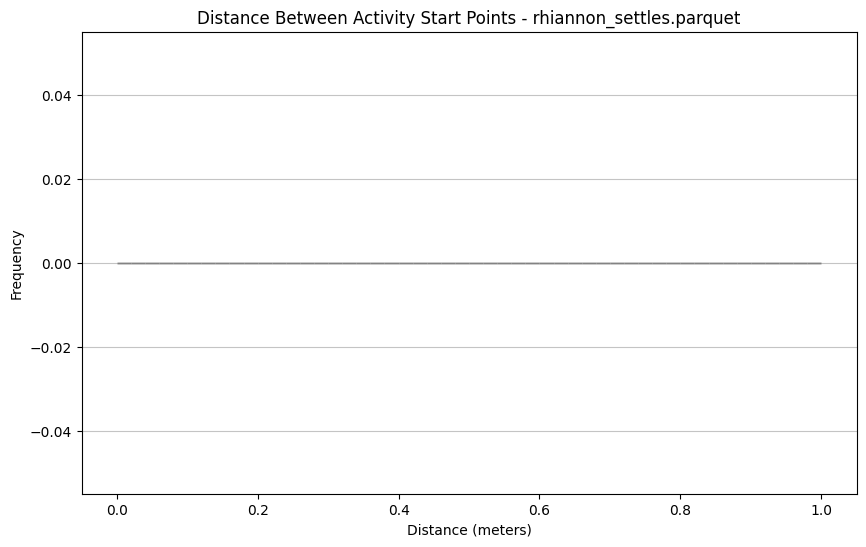


Processing: george_bella.parquet


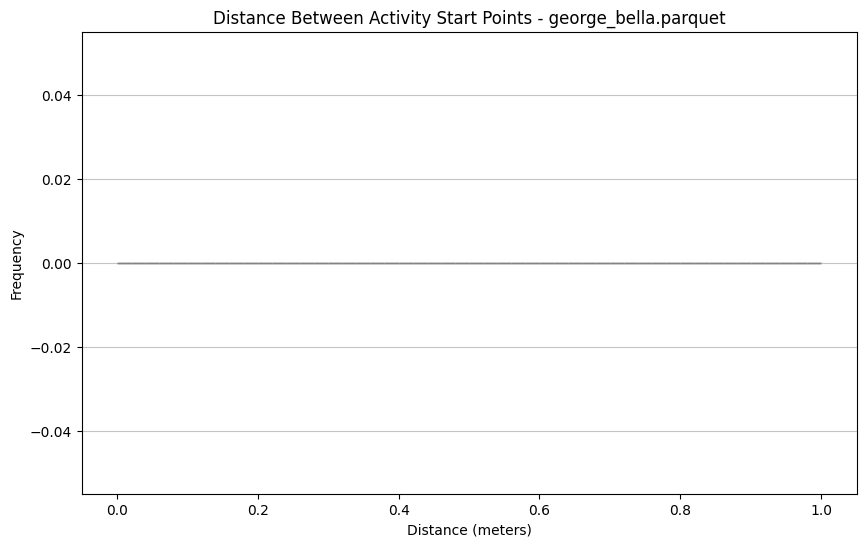


Processing: mollie_melton.parquet


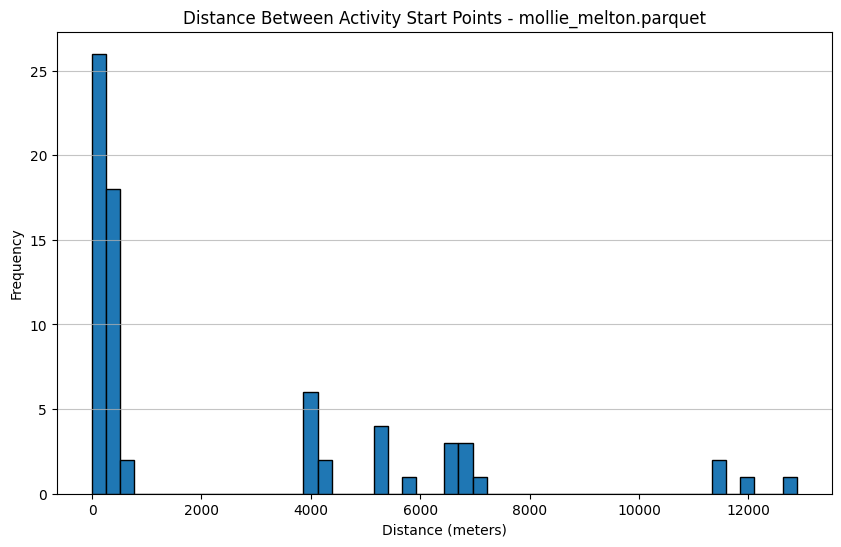


Processing: geraud_mousnier.parquet


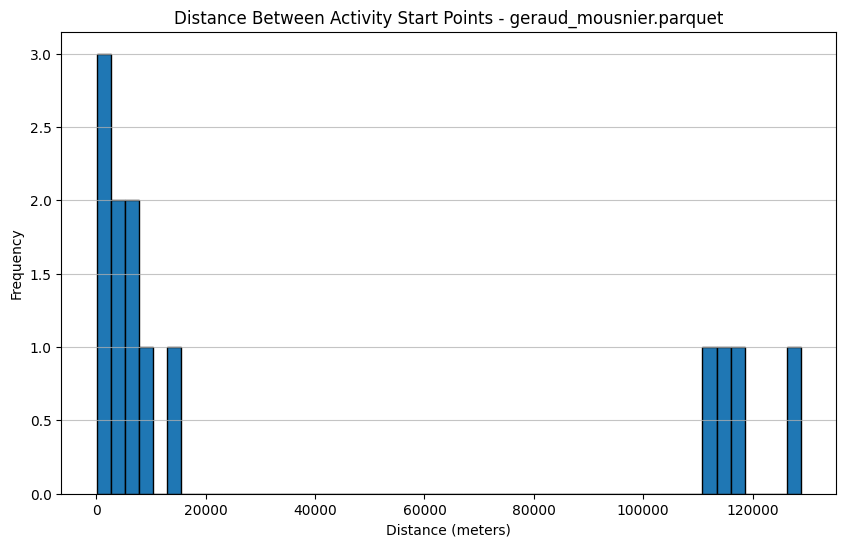


Processing: david_bunting.parquet


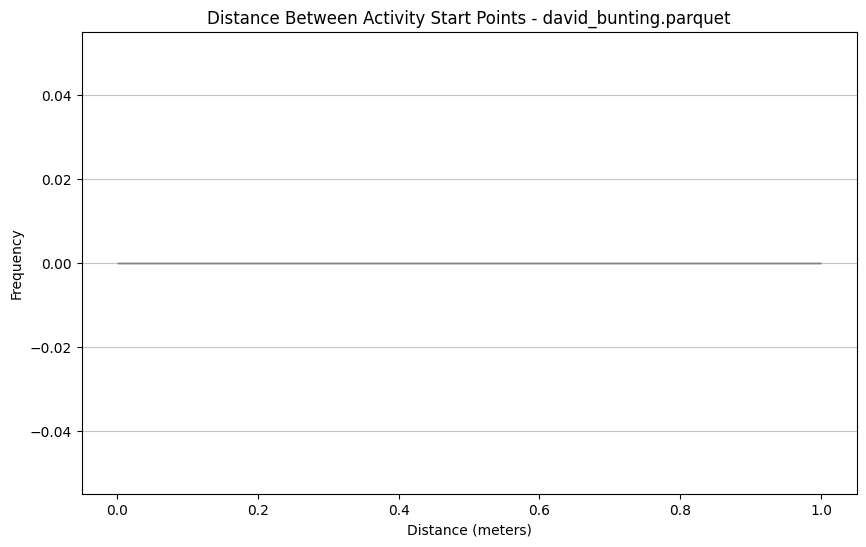


Processing: huggi_bayanbyamba.parquet


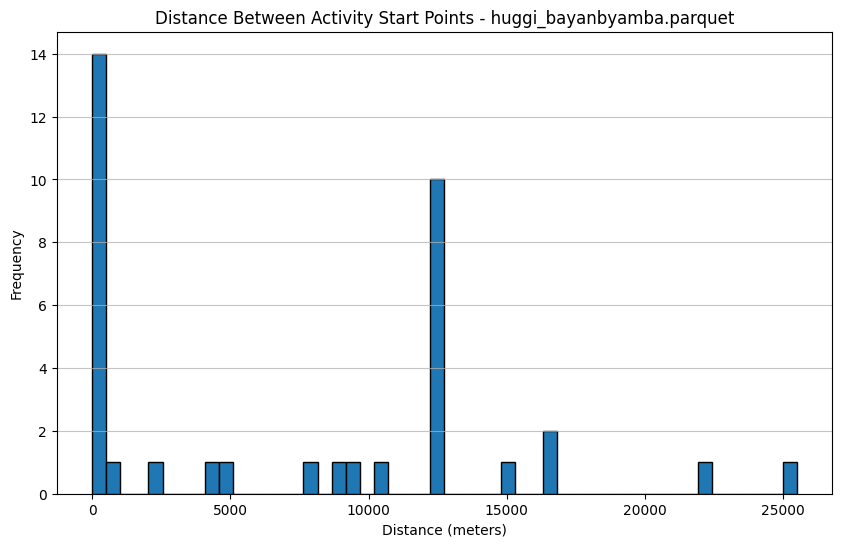


Processing: noah_white.parquet


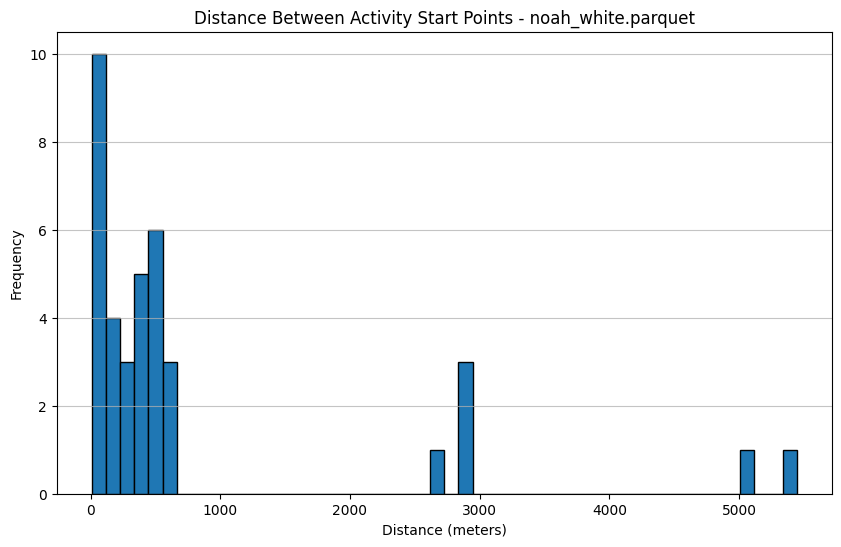


Processing: eileen_cohen.parquet


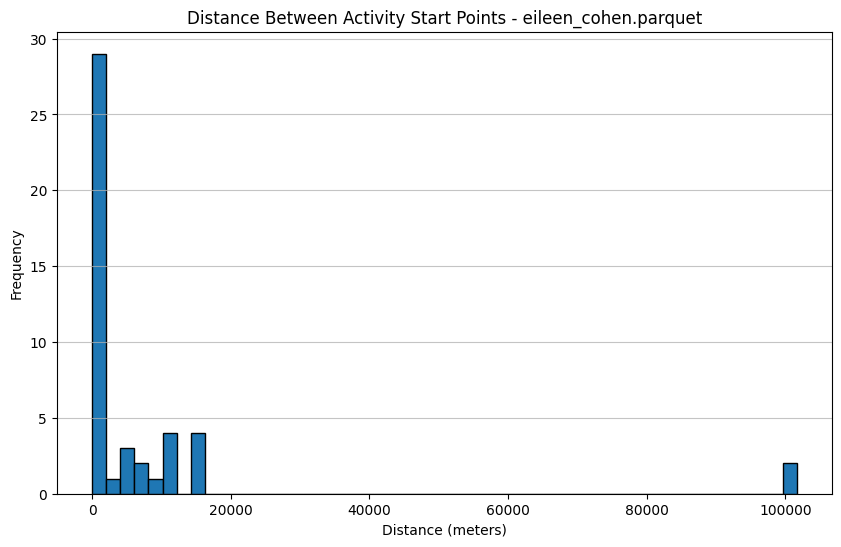


Processing: andre_tannemann.parquet


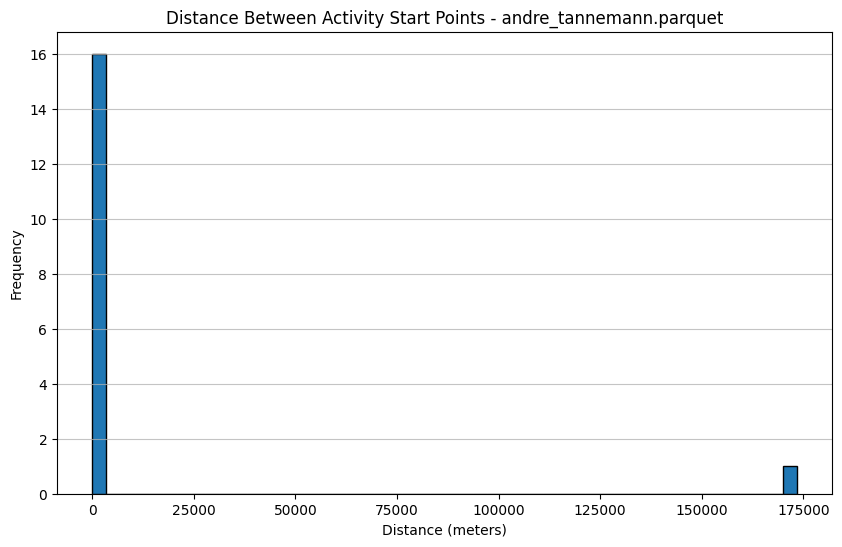


Processing: ken_kirsch.parquet


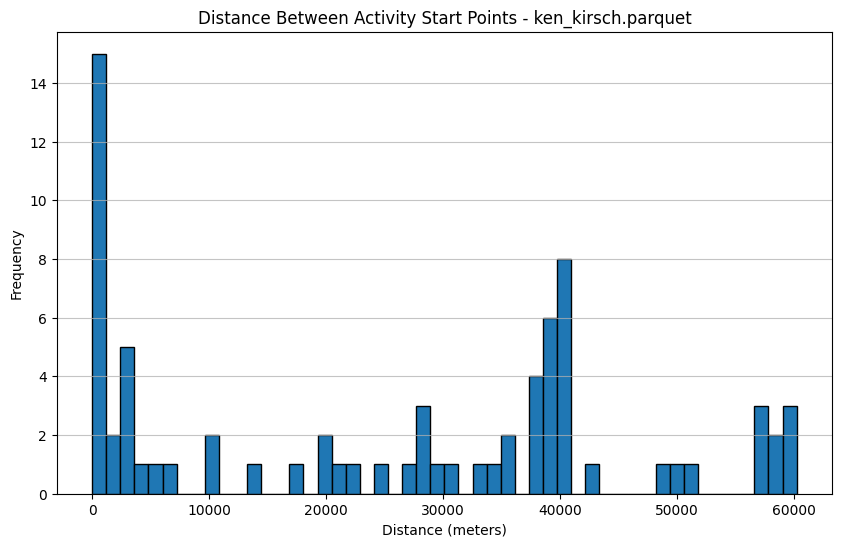


Processing: stuart_foster.parquet


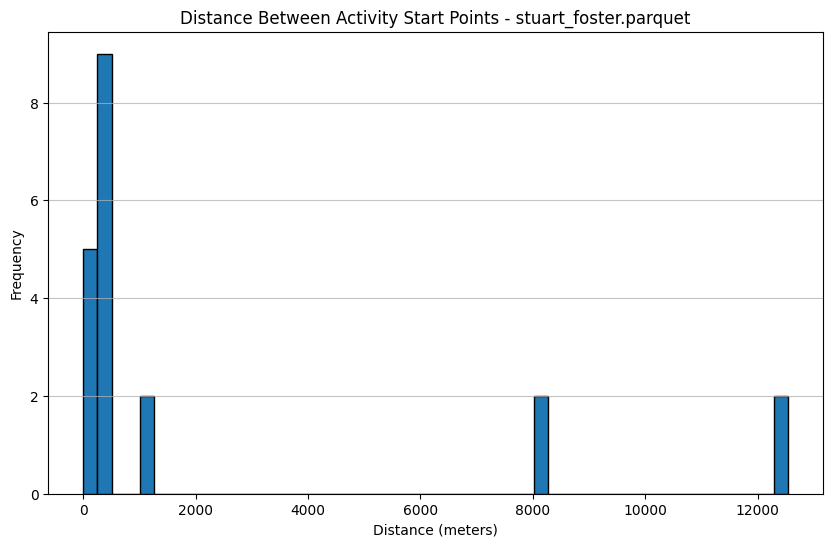


Processing: steve_schohn.parquet


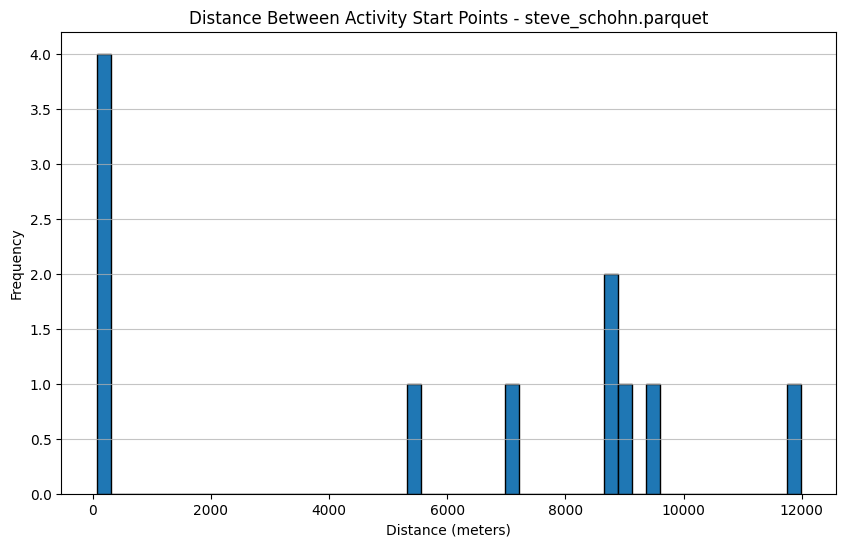


Processing: jen_cadenhead.parquet


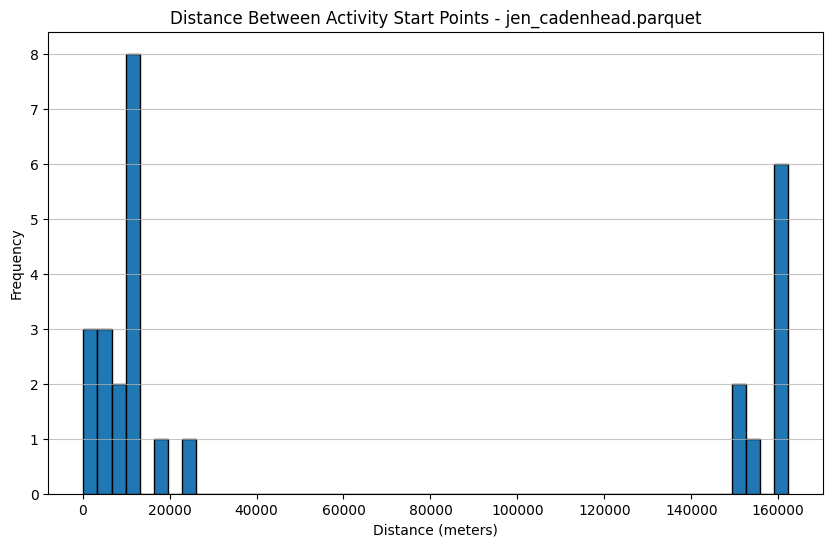


Processing: amy_pizer.parquet


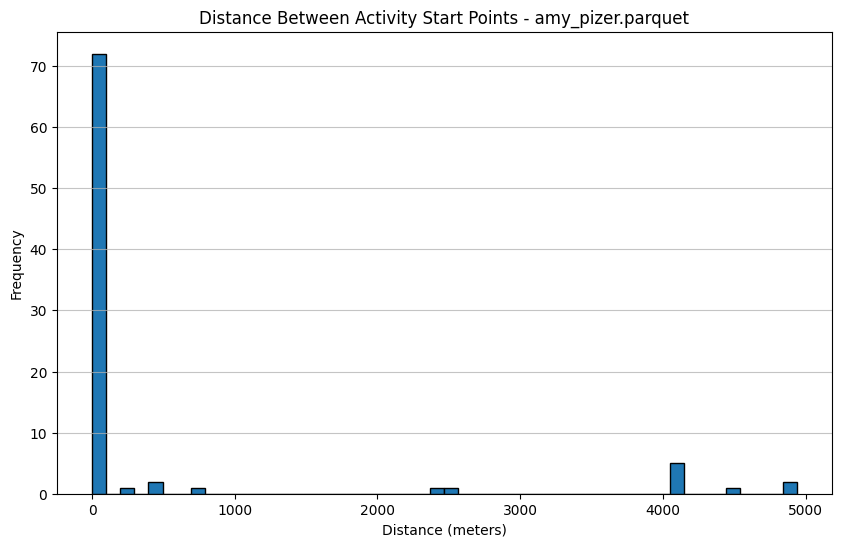


Processing: andrew_mccrory.parquet


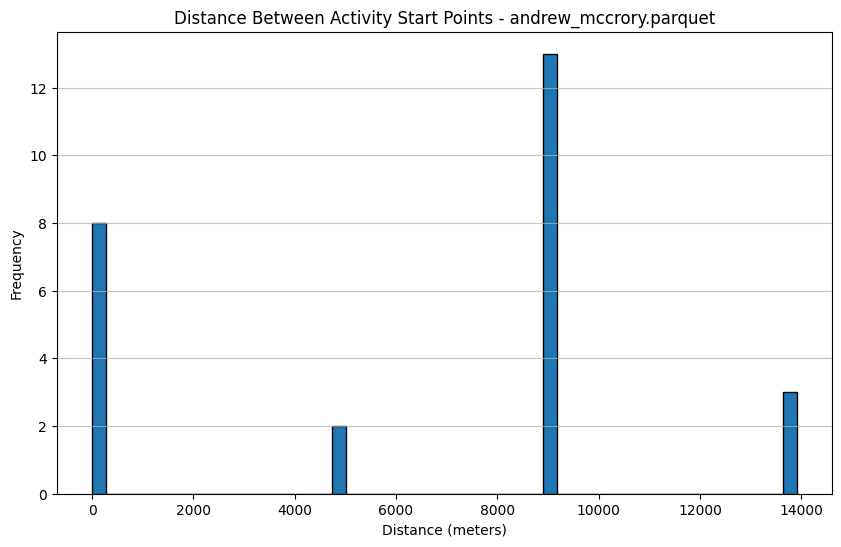


Processing: john_thayer.parquet


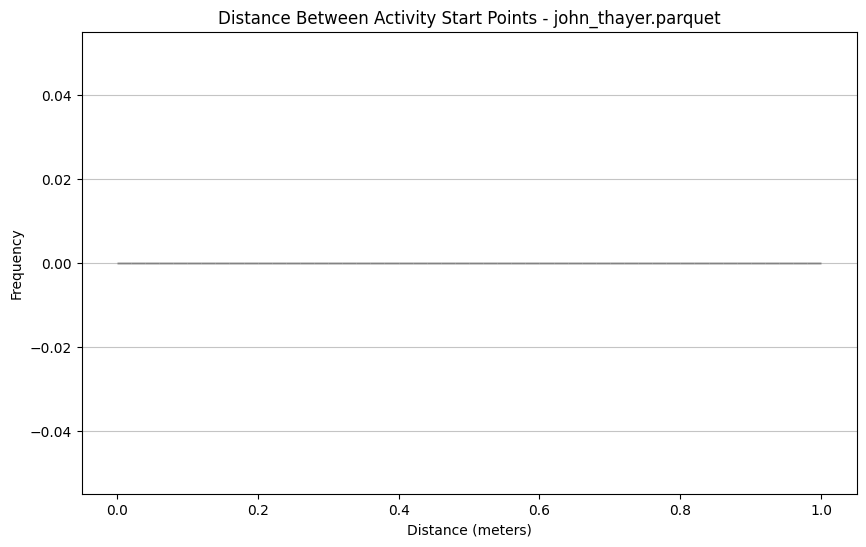


Processing: mark_bull.parquet


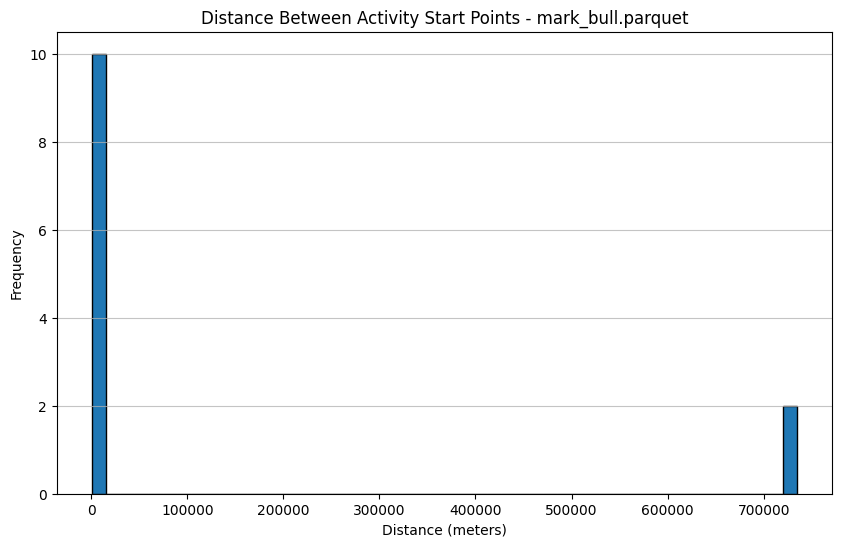


Processing: tom_weaver.parquet


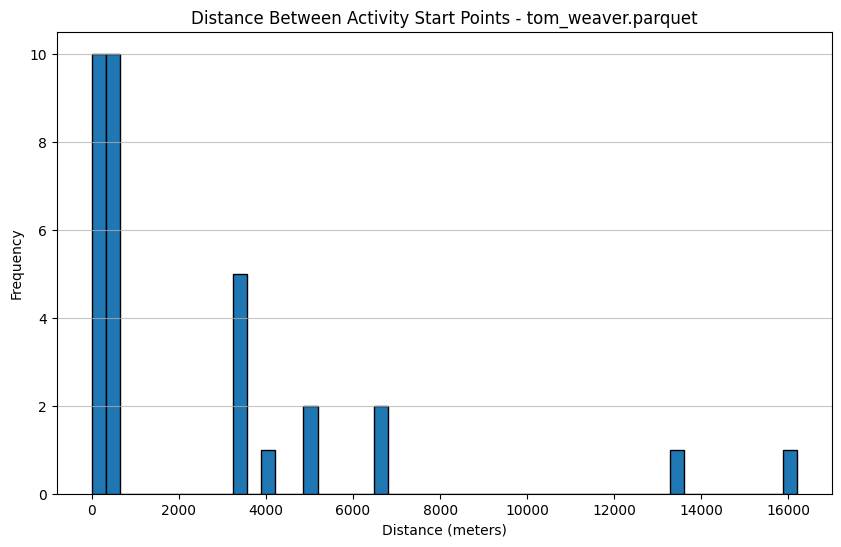


Processing: chris_calimano.parquet


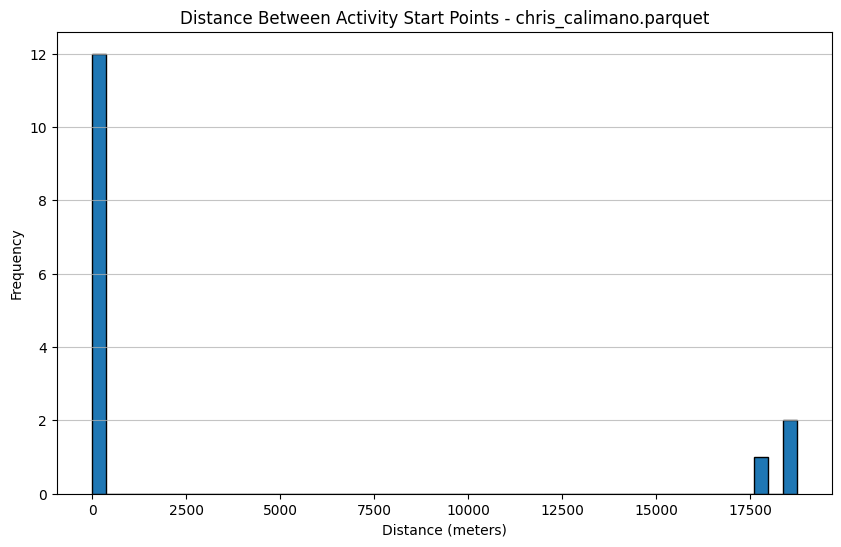


Processing: bethany_pribila.parquet


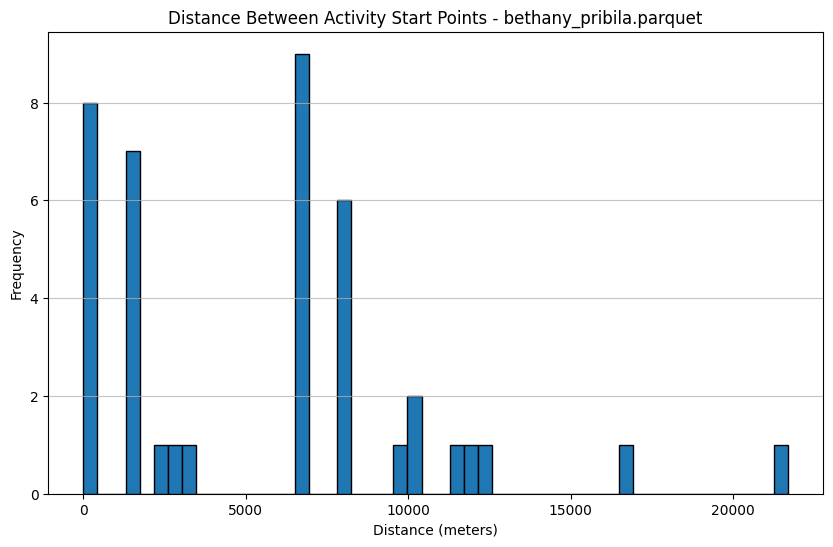


Processing: zeph_brand.parquet


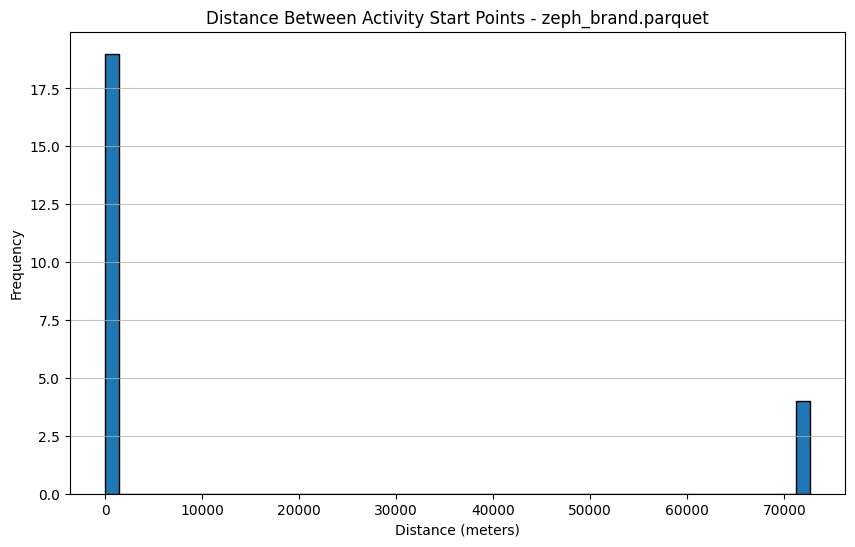


Processing: vera_stetinova.parquet


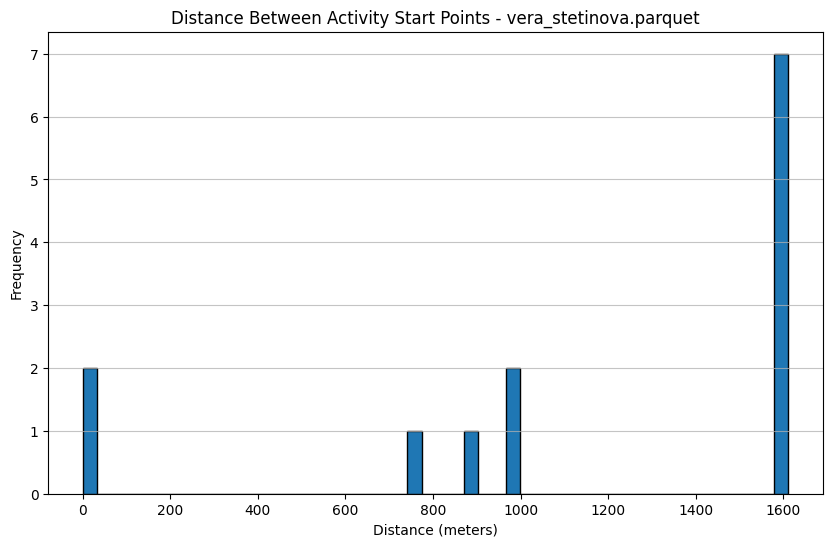


Processing: mathias_göbel.parquet


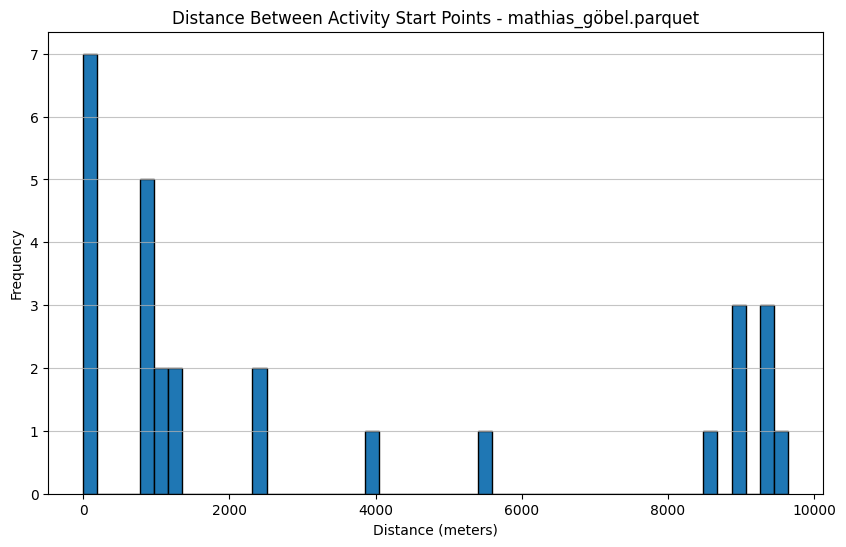


Processing: monique_barrant.parquet


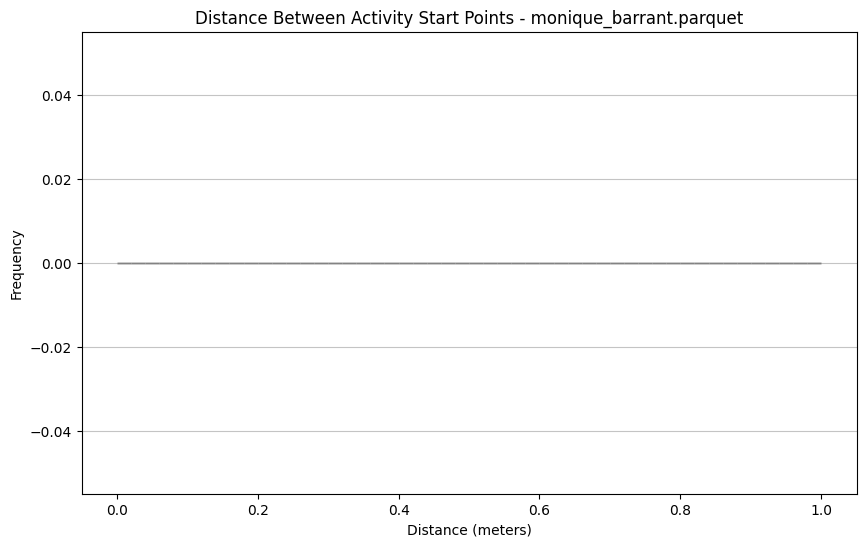


Processing: w_ford_graham.parquet


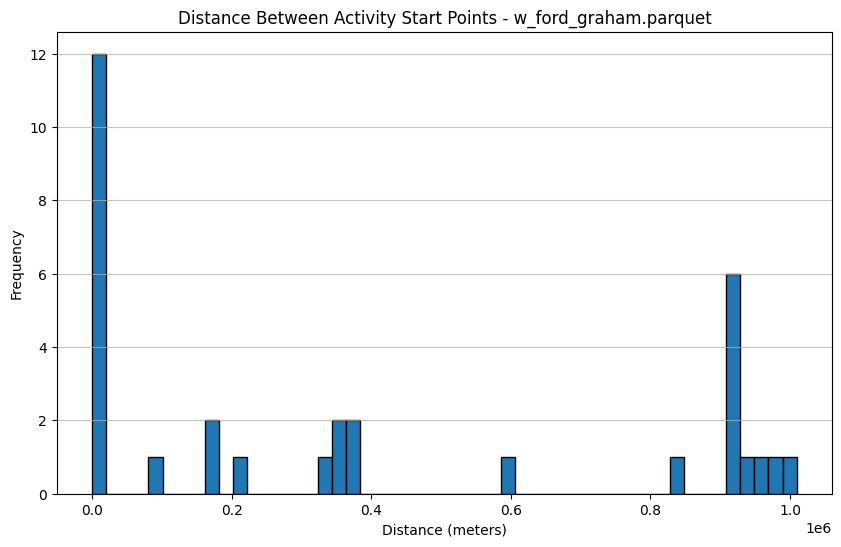


Processing: bryan_twomey.parquet


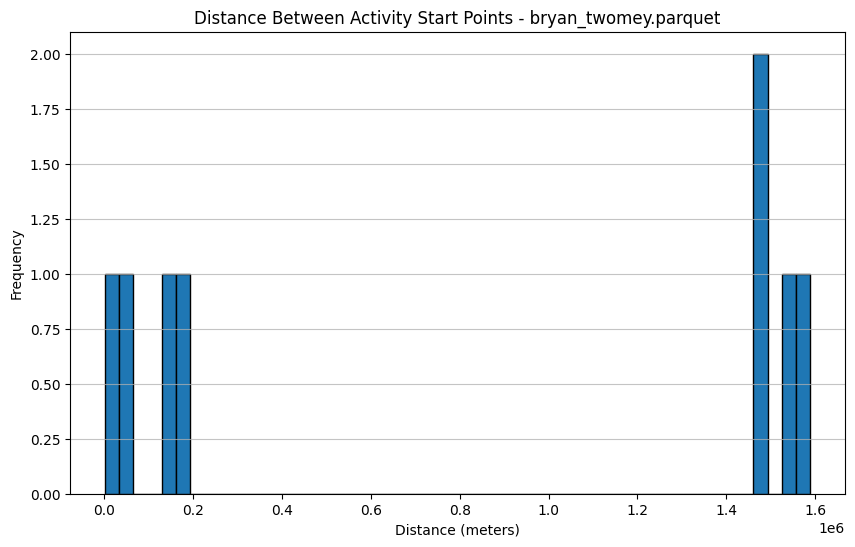


Processing: angela_chong.parquet


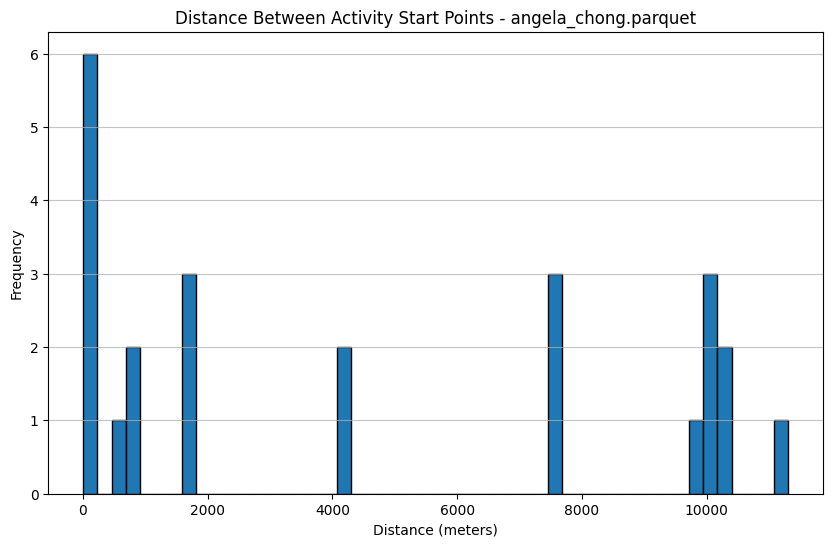


Processing: kevin_dockemeyer.parquet


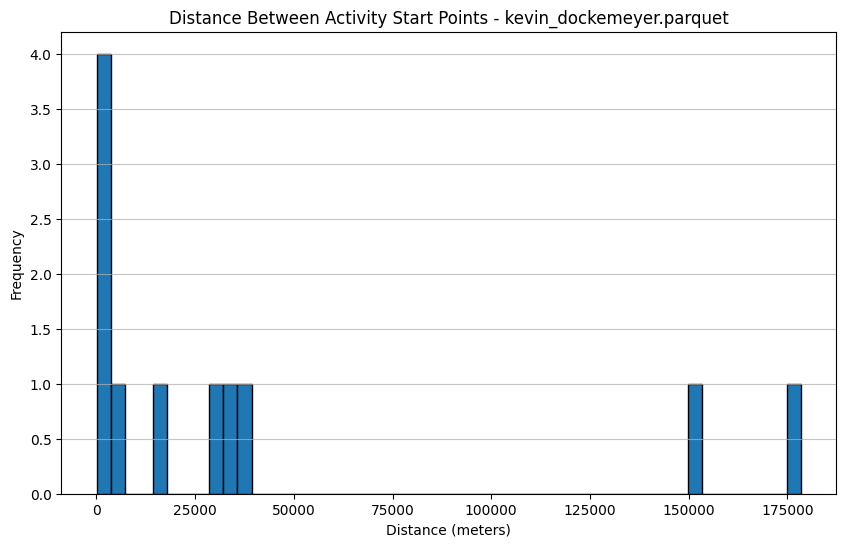


Processing: jeffrey_ruiz.parquet


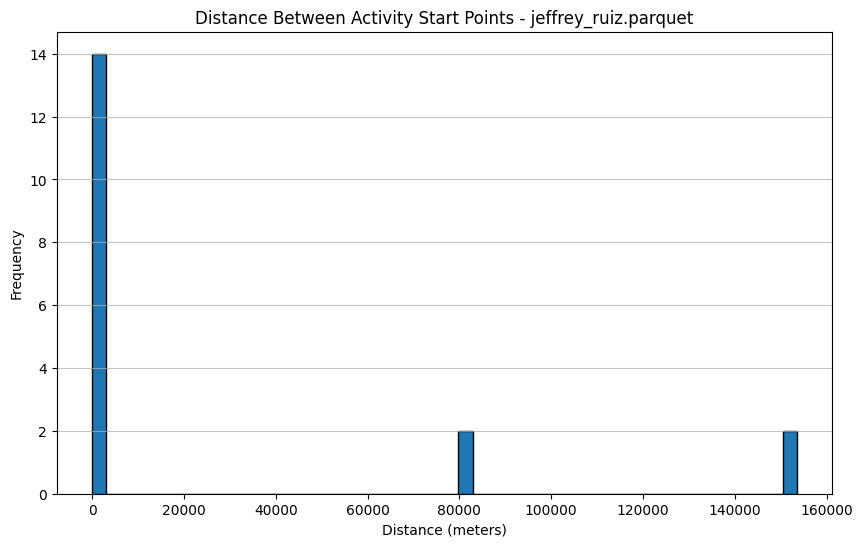


Processing: marc_sanderson.parquet


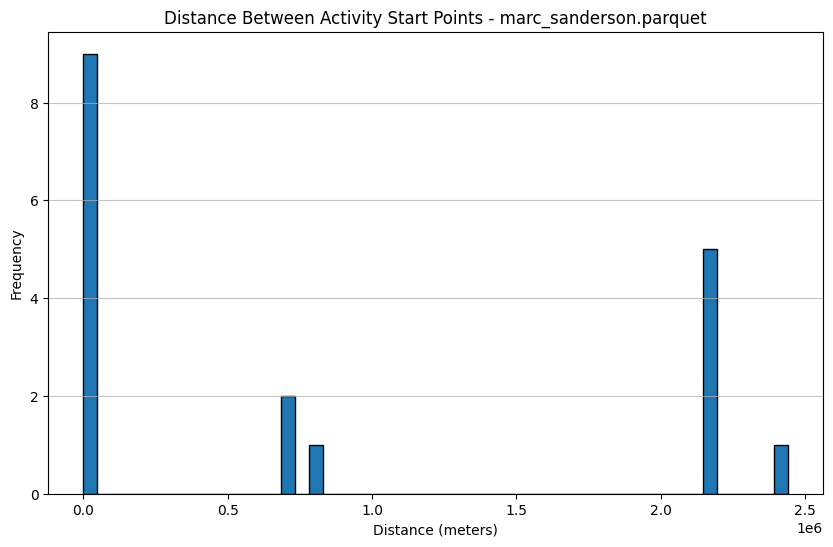


Processing: caryn_lubetsky.parquet


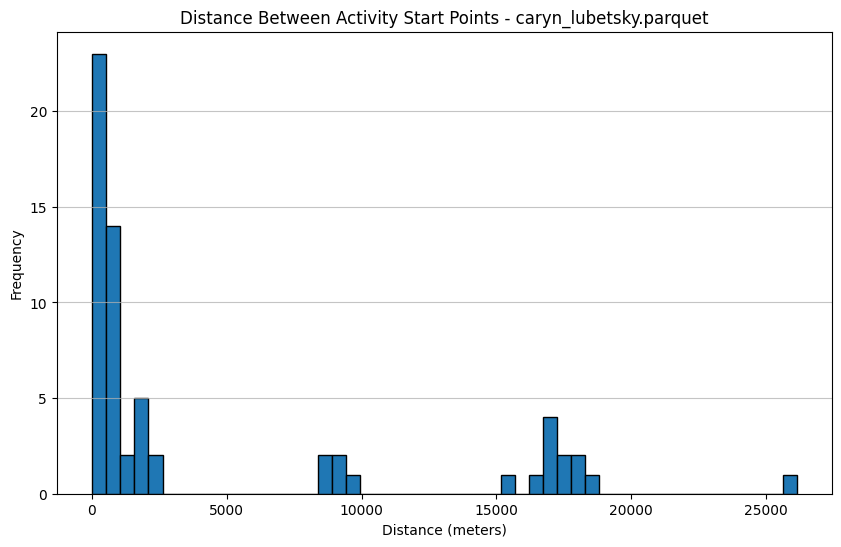


Processing: rhiannon_bramer.parquet


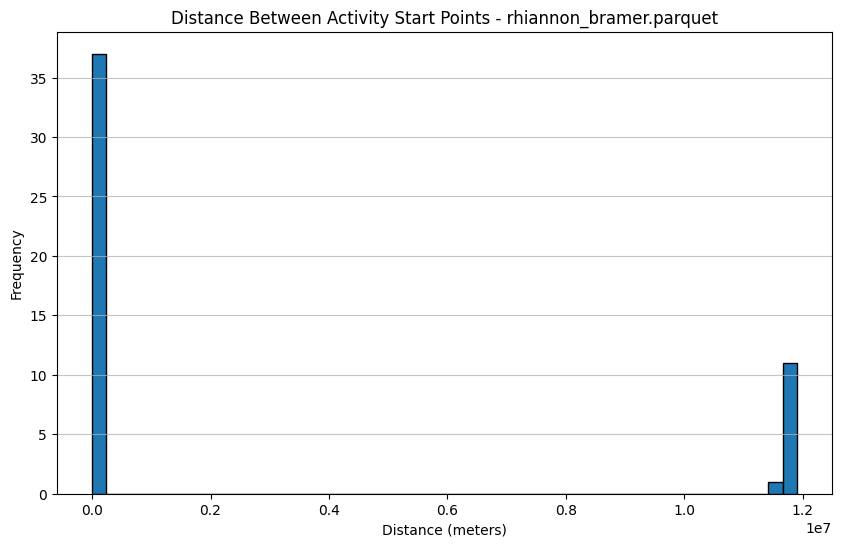


Processing: dani_grigsby.parquet


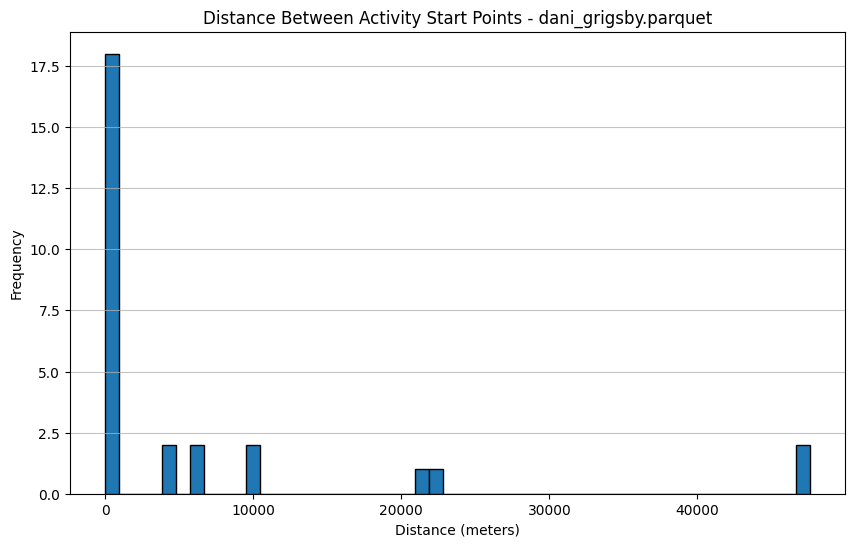


Processing: dave_krupski.parquet


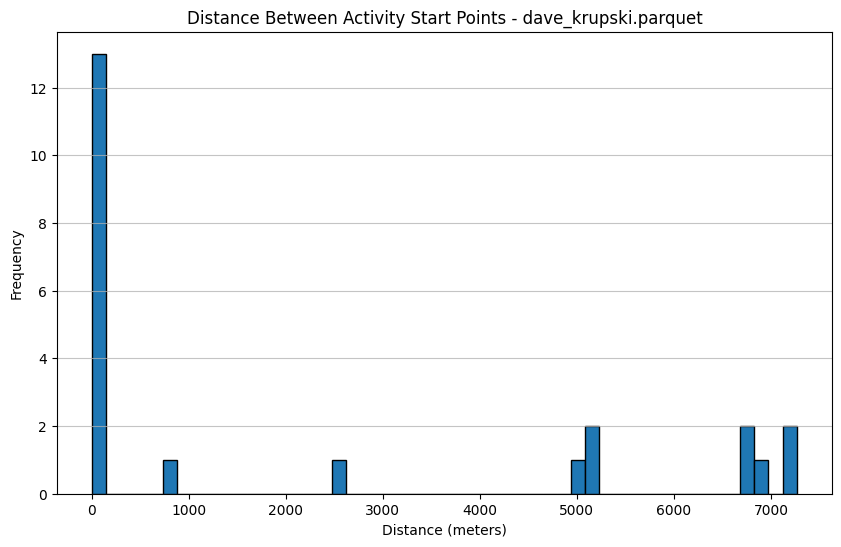


Processing: evgeny_arbatov.parquet


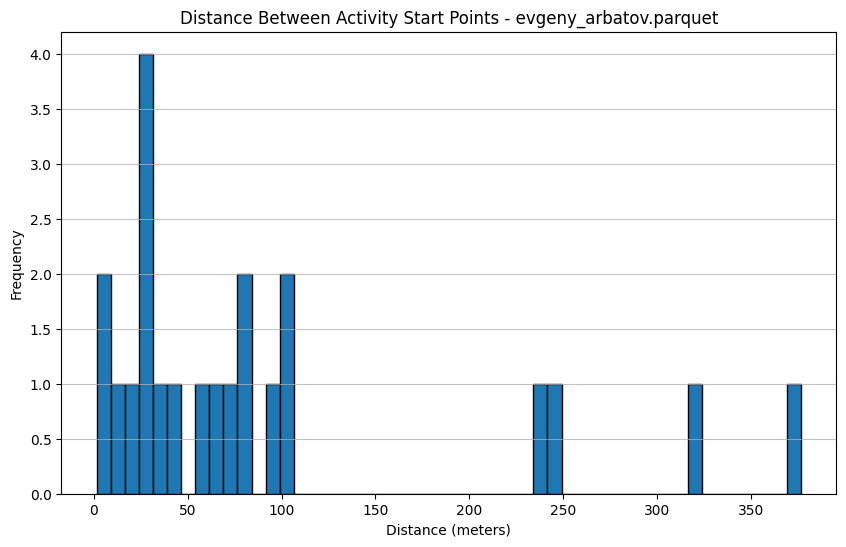


Processing: sean_richard.parquet


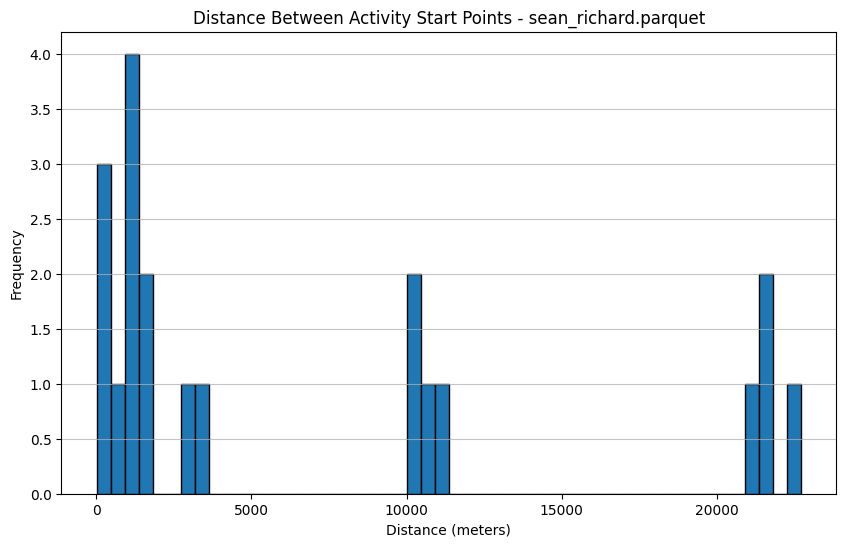


Processing: andreas_stemberger.parquet


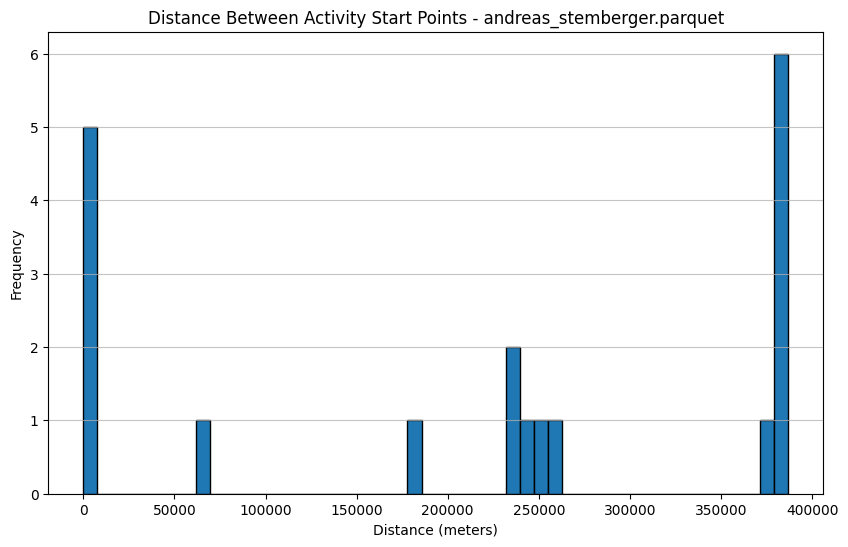


Processing: simen_holvik.parquet


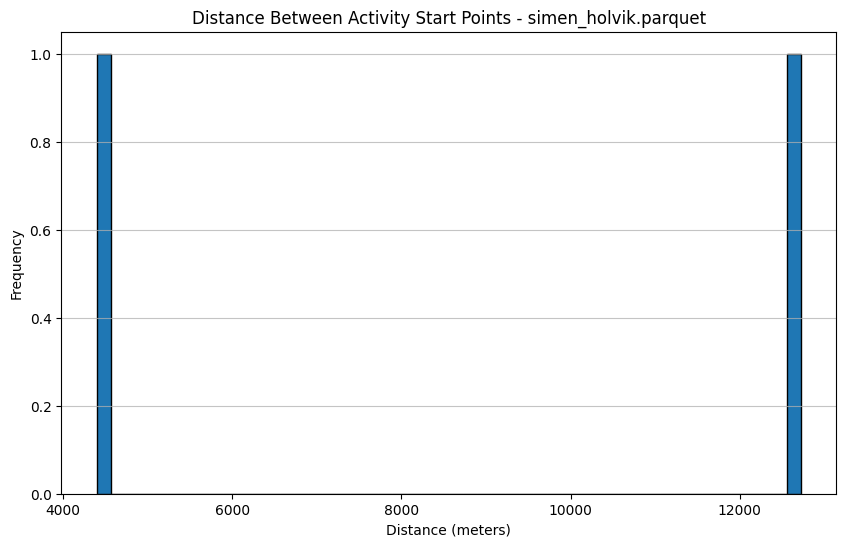


Processing: madoka_spence.parquet


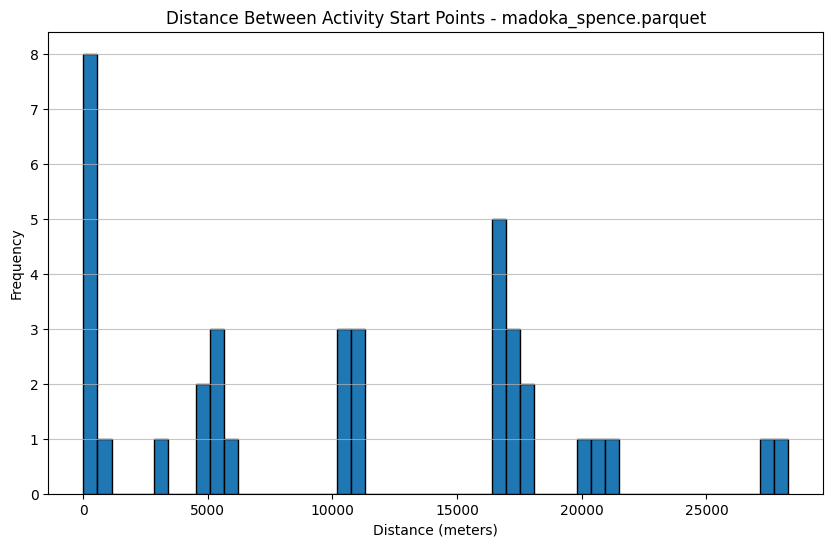


Processing: rebecca_oliver.parquet


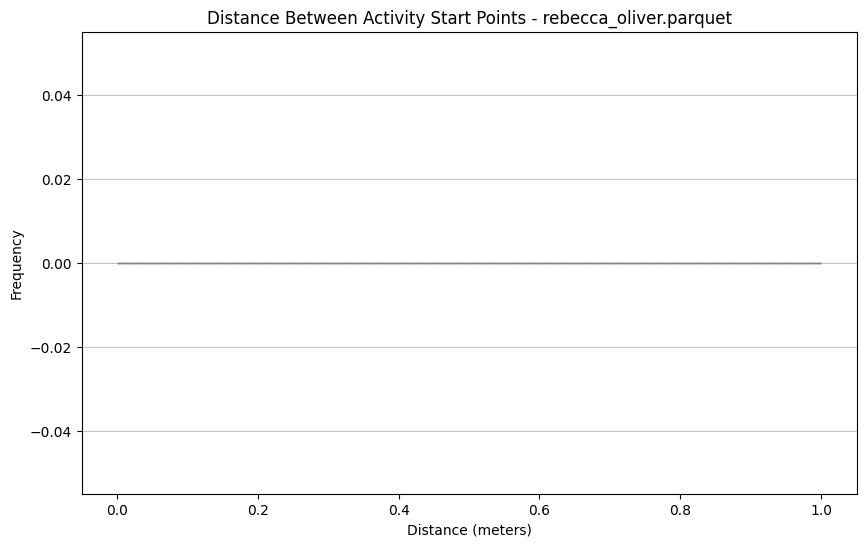


Processing: kevin_koncilja.parquet


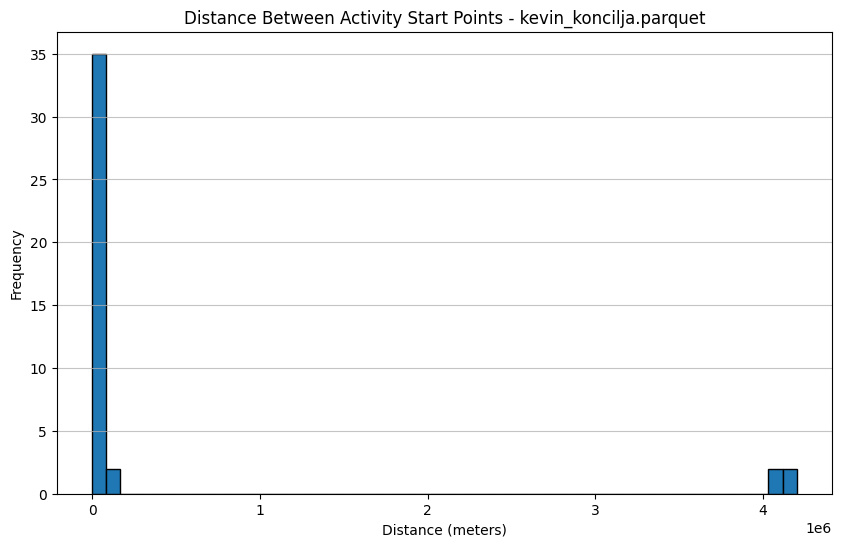


Processing: michael_postulka.parquet


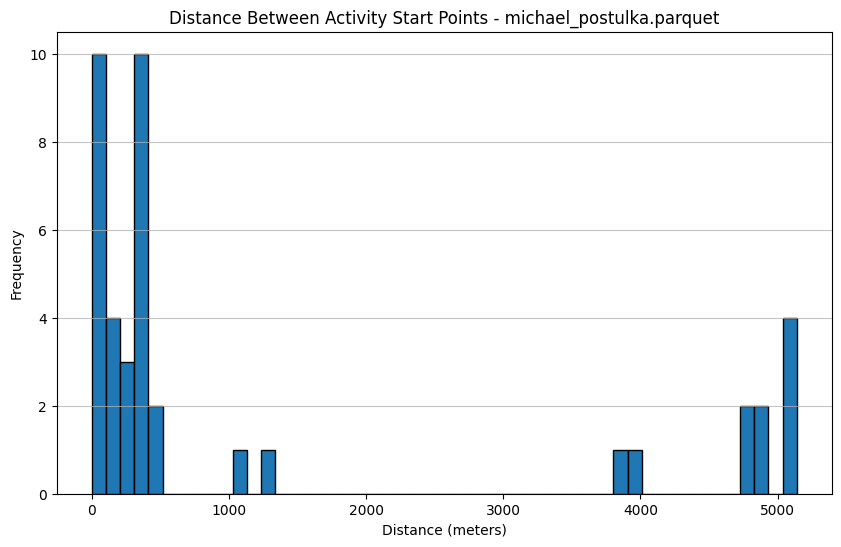


Processing: anonymous_participant.parquet


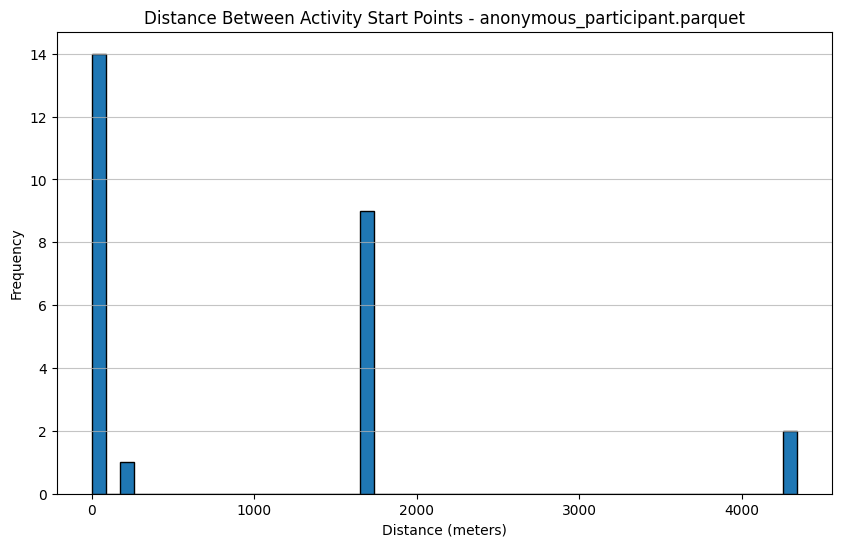


Processing: jessica_de_la_cruz.parquet


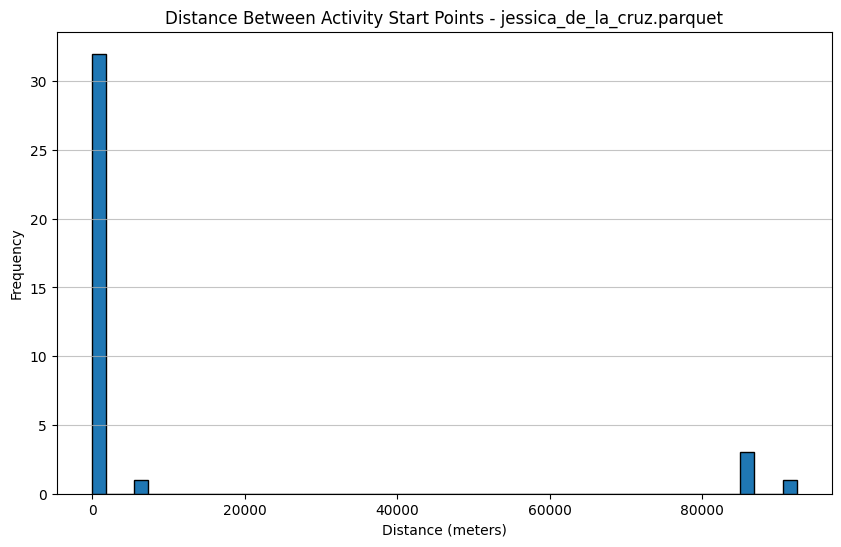


Processing: angela_hawley.parquet


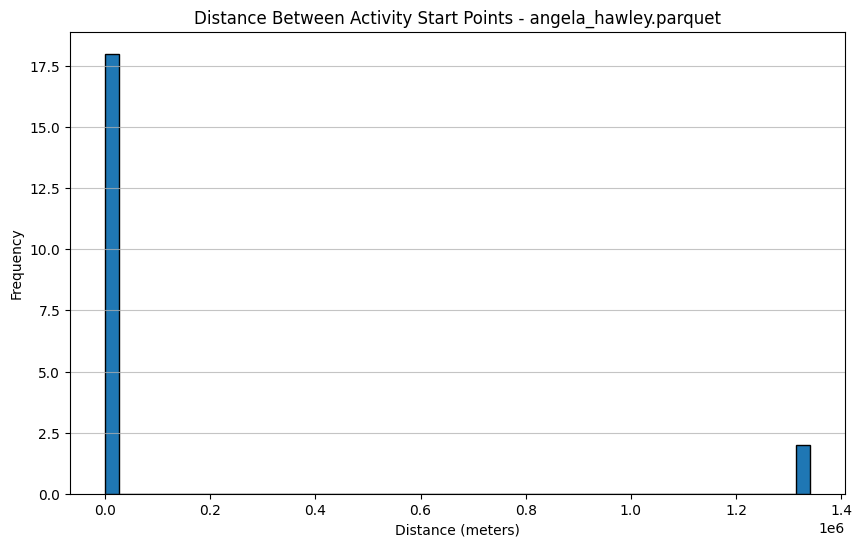


Processing: tim_walter_reudelsdorff.parquet


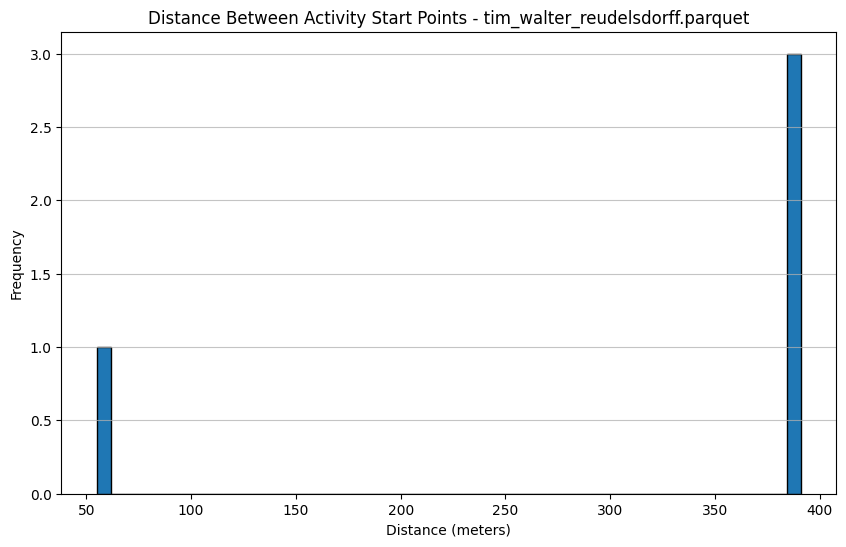


Processing: emily_lyons.parquet


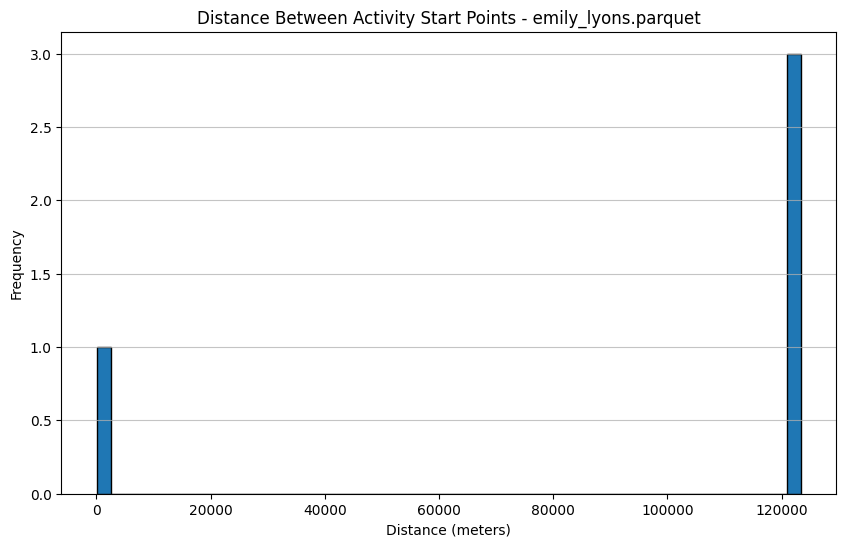


Processing: aner_cosme.parquet


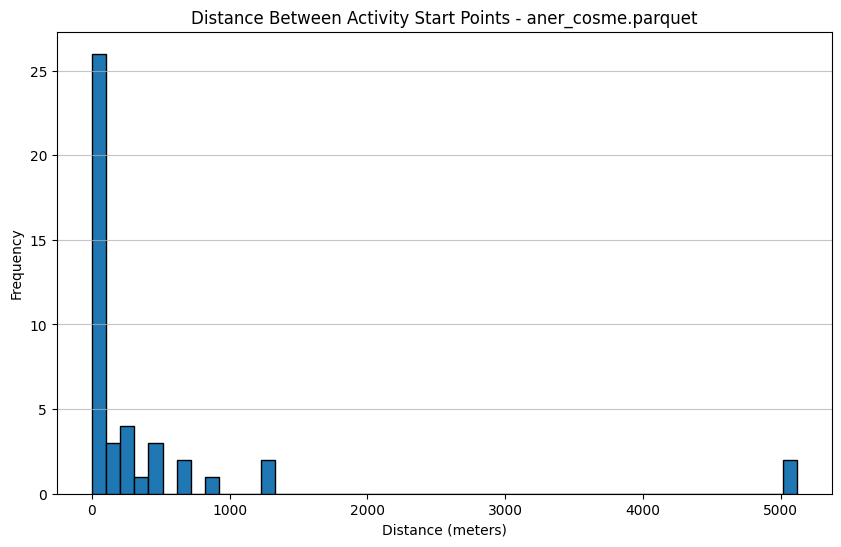


Processing: stephen_mick.parquet


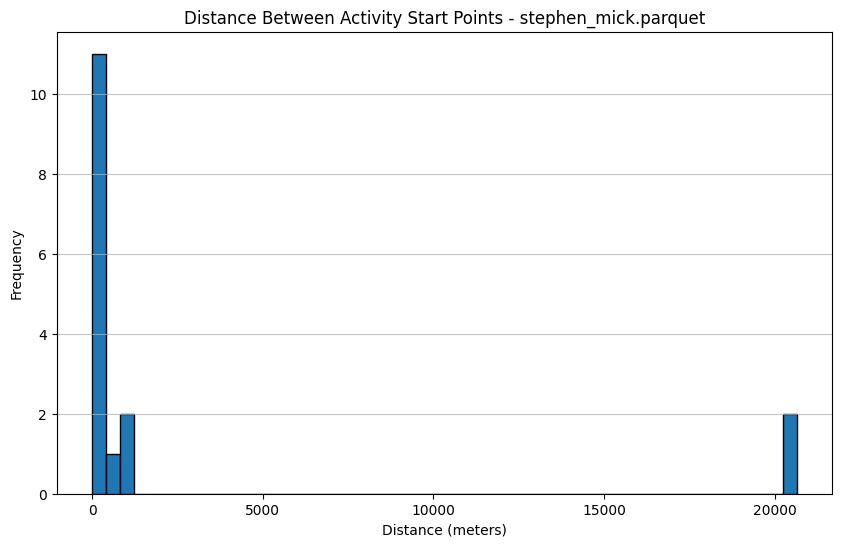


Processing: jeffrey_jordan.parquet


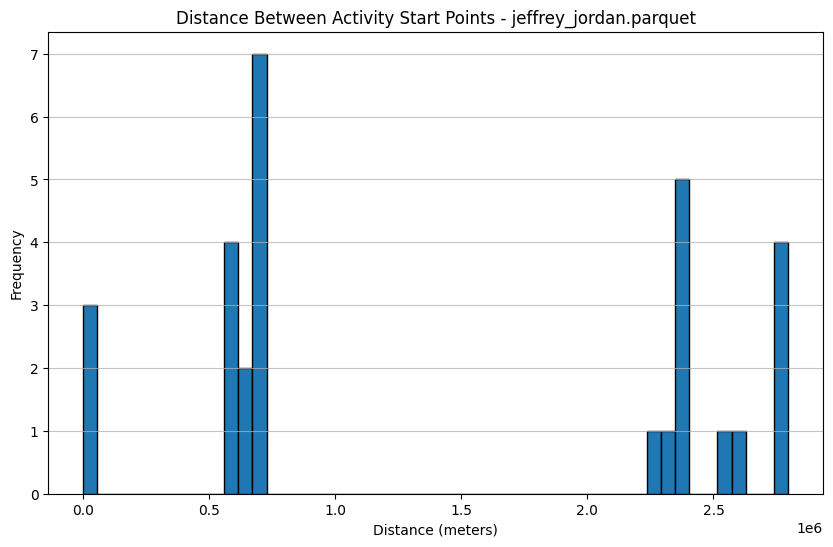


Processing: athanasia_tolidou.parquet


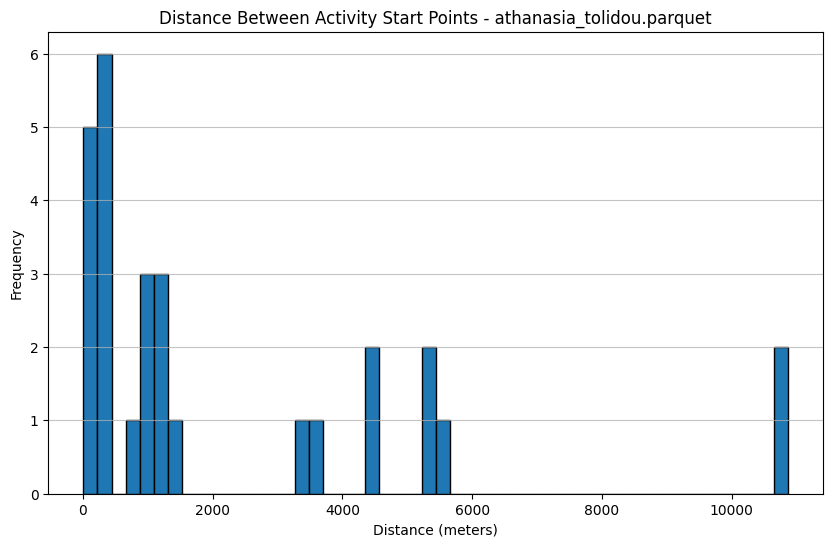


Processing: christian_nogens.parquet


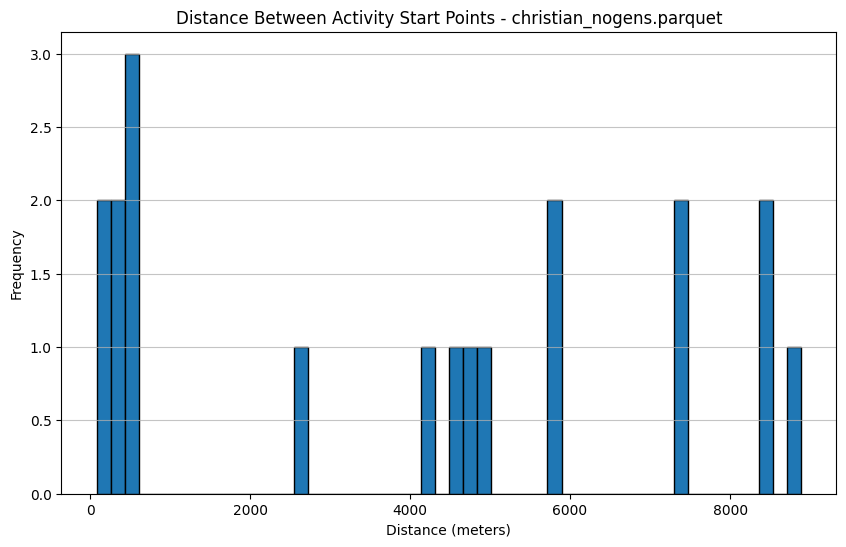


Processing: david_van_den_bossche.parquet


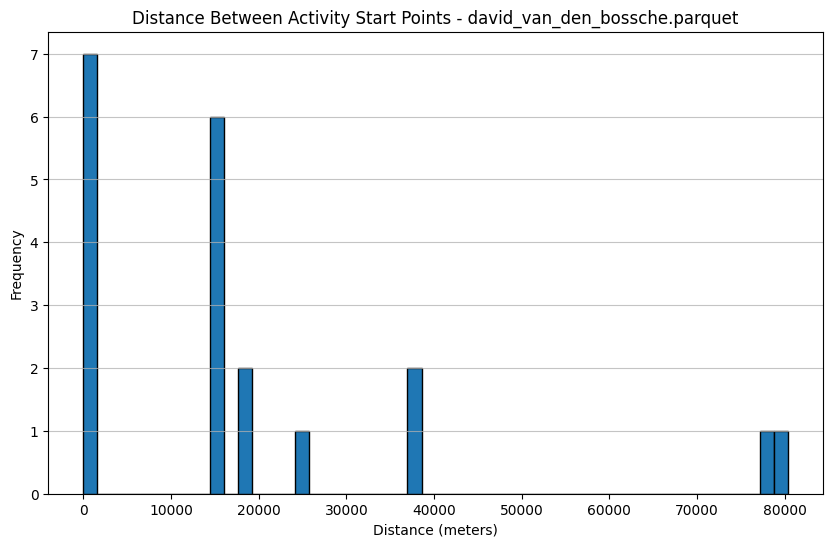

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from geopy.distance import geodesic

# --- Configuration ---
content_dir = '/content'  # Folder with .parquet files
parquet_files = [f for f in os.listdir(content_dir) if f.endswith('.parquet')]

# Histogram color (blue)
hist_color = '#1f77b4'

# --- Helper functions ---
def extract_start_coordinate(geometry):
    """Extract the starting coordinate from a geometry as (lat, lon)."""
    if geometry is None or geometry.is_empty:
        return None
    coords = [(coord[1], coord[0]) for coord in geometry.coords]  # (lat, lon)
    return coords[0] if coords else None

def compute_start_distances_meters(start_points):
    """Compute distances in meters between consecutive start points."""
    distances = []
    for i in range(len(start_points) - 1):
        if start_points[i] is None or start_points[i+1] is None:
            continue
        dist_m = geodesic(start_points[i], start_points[i+1]).km * 1000
        distances.append(dist_m)
    return distances

# --- Process each parquet file separately ---
for parquet_file in parquet_files:
    print(f"\nProcessing: {parquet_file}")
    file_path = os.path.join(content_dir, parquet_file)

    gdf = gpd.read_parquet(file_path)

    # Extract starting points
    start_points = gdf['geometry'].apply(extract_start_coordinate).dropna()

    # Compute distances between start points
    start_distances = compute_start_distances_meters(start_points.tolist())

    # --- Plot distribution for this parquet file ---
    plt.figure(figsize=(10, 6))
    plt.hist(start_distances, bins=50, color=hist_color, edgecolor='black')
    plt.title(f'Distance Between Activity Start Points - {parquet_file}')
    plt.xlabel('Distance (meters)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
